

# Machine Learning Project: Price prediction for Hostellar 



## Part 1 : Context

Hostellar description :

Our mission
    Today, hostellar co-founders want to find a better way to automate the prediction of their appartment's loan price. In order to do that, we suggested to use a Machine Learning which will rely on a huge dataset of Airbnb.



Importer mon drive et son contenu

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

os.chdir("/content/drive/My Drive/ECE/ING4/Machine Learning/Projet/")
!ls

# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
calendar.csv  listings.csv  seasonal.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df_listings = pd.read_csv("listings.csv")
pd.set_option('display.max_rows', None)

df_calendar = pd.read_csv("calendar.csv")

df_seasonal = pd.read_csv("seasonal.csv")
df_seasonal_test = pd.read_csv("seasonal.csv")

df_calendar.shape
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11551,2019-11-06,f,$105.00,$105.00,3.0,180.0
1,90700,2019-11-06,f,$125.00,$125.00,90.0,1125.0
2,90700,2019-11-07,f,$125.00,$125.00,90.0,1125.0


In [0]:
df_seasonal_test1 = pd.read_csv("seasonal.csv")

In [4]:
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11551,2019-11-06,f,$105.00,$105.00,3.0,180.0
1,90700,2019-11-06,f,$125.00,$125.00,90.0,1125.0
2,90700,2019-11-07,f,$125.00,$125.00,90.0,1125.0


In [5]:
df_listings.shape
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20191105115249,2019-11-06,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,NaN,NaN,https://a0.muscache.com/im/pictures/1d720898-c...,NaN,43039,https://www.airbnb.com/users/show/43039,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Brixton,Lambeth,...,$20.00,3,180,3,3,180,180,3.0,180.0,4 days ago,t,17,41,61,336,2019-11-06,185,2,2010-03-21,2019-09-15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.58
1,38151,https://www.airbnb.com/rooms/38151,20191105115249,2019-11-06,Double room/ lounge,NaN,"Comfortable, large double room /lounge area av...","Comfortable, large double room /lounge area av...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/214176/451...,NaN,163634,https://www.airbnb.com/users/show/163634,Lisa,2010-07-11,GB,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Crystal Palace,1.0,1.0,['phone'],f,f,"Upper Norwood, Surrey, United Kingdom",LB of Croydon,Croydon,...,$0.00,1,730,1,1,730,730,1.0,730.0,never,t,30,60,90,365,2019-11-06,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,NaN
2,13913,https://www.airbnb.com/rooms/13913,20191105115249,2019-11-06,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...

In [17]:
#compter le nb de xx en NAN
df_listings.isna().sum()

accommodates                0
bathrooms                 121
bedrooms                   89
beds                      149
price                       0
availability_365            0
number_of_reviews           0
review_scores_rating    21622
dtype: int64

In [7]:
df_seasonal.shape
#df_seasonal.head(3)
df_calendar['date'] =  pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')
for i in range(5, 8):
    print(df_calendar['date'].loc[i])

2019-11-10 00:00:00
2019-11-11 00:00:00
2019-11-12 00:00:00


In [0]:
#Modifier le type de la colonne Date 
#df_calendar['date'].astype()
df_calendar['date'] =  pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')

In [0]:
#Modifier le type de la colonne Id
df_seasonal_test['id'] = pd.to_numeric(df_seasonal_test['id'])
df_listings['id'] = pd.to_numeric(df_listings['id'])

In [0]:
#Enlever le $ dans price (calendar)
df_calendar['price']=df_calendar['price'].str[1:]

In [0]:
#Enlever les , dans price (calendar)
df_calendar['price']=df_calendar['price'].str.replace(',', '')

In [0]:
#Modifier le type des colonnes prices dans calendar et seasonnal
df_seasonal_test1['winter_price'] = pd.to_numeric(df_seasonal_test1['winter_price'])
df_seasonal_test1['spring_price'] = pd.to_numeric(df_seasonal_test1['spring_price'])
df_seasonal_test1['summer_price'] = pd.to_numeric(df_seasonal_test1['summer_price'])
df_seasonal_test1['autumn_price'] = pd.to_numeric(df_seasonal_test1['autumn_price'])
df_calendar['price'] = pd.to_numeric(df_calendar['price'])

In [13]:
#Dropper les colonnes qui ne servent à rien
to_drop =['listing_url', 'scrape_id', 'last_scraped', 'experiences_offered','neighborhood_overview','notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_acceptance_rate', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact','square_feet','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_30','availability_60','availability_90','calendar_last_scraped','number_of_reviews_ltm','first_review','last_review','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','requires_license','license','jurisdiction_names','is_business_travel_ready','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month']
df_listings.drop(to_drop, axis = 1, inplace = True)
df_listings.shape

(85068, 22)

In [14]:
to_drop =['weekly_price','monthly_price']
df_listings.drop(to_drop, axis = 1, inplace = True)
df_listings.shape

(85068, 20)

In [16]:
to_drop =['id','space','state','name','description','summary','zipcode','property_type','room_type','bed_type','amenities','instant_bookable']
df_listings.drop(to_drop, axis = 1, inplace = True)
df_listings.shape

(85068, 8)

In [46]:
#A supprimer
to_drop =['accommodates','availability_365','beds','bedrooms','bathrooms']
df_listings_clean.drop(to_drop, axis = 1, inplace = True)
df_listings_clean.shape

(63349, 3)

In [0]:
#Drop les lignes avec NAN
df_listings_clean = df_listings.dropna()

In [63]:
df_listings_clean.nunique()

accommodates             17
bathrooms                24
bedrooms                 15
beds                     22
price                   655
availability_365        366
number_of_reviews       415
review_scores_rating     62
dtype: int64

In [73]:
#Check data 
df_listings_clean.shape
df_listings_clean.head()

,accommodates,bathrooms,bedrooms,beds,price,availability_365,number_of_reviews,review_scores_rating
0,4,1.0,1.0,1.0,$88.00,336,185,92.0
2,2,1.0,1.0,0.0,$65.00,365,19,97.0
3,2,1.0,1.0,1.0,$79.00,5,137,95.0
4,2,1.0,1.0,1.0,$105.00,268,339,88.0
5,2,1.0,1.0,1.0,$100.00,158,88,96.0


In [0]:
#Modifier les données des colonnes 
#df_listings_clean['id'] = pd.to_numeric(df_listings_clean['id'])
df_listings_clean['accommodates'] = pd.to_numeric(df_listings_clean['accommodates'])
df_listings_clean['bathrooms'] = pd.to_numeric(df_listings_clean['bathrooms'])
df_listings_clean['bedrooms'] = pd.to_numeric(df_listings_clean['bedrooms'])
df_listings_clean['price']=df_listings_clean['price'].str[1:]
df_listings_clean['price']=df_listings_clean['price'].str.replace(',', '')
df_listings_clean['price'] = pd.to_numeric(df_listings_clean['price'])
df_listings_clean['availability_365'] = pd.to_numeric(df_listings_clean['availability_365'])
df_listings_clean['number_of_reviews'] = pd.to_numeric(df_listings_clean['number_of_reviews'])
df_listings_clean['review_scores_rating'] = pd.to_numeric(df_listings_clean['review_scores_rating'])



In [0]:
#Test
df_listings_clean['name'] = df_listings_clean['name'].astype(str)
df_listings_clean['summary'] = df_listings_clean['summary'].astype(str)
df_listings_clean['description'] = df_listings_clean['description'].astype(str)
df_listings_clean['zipcode'] = df_listings_clean['zipcode'].astype(str)
df_listings_clean['property_type'] = df_listings_clean['property_type'].astype(str)
df_listings_clean['room_type'] = df_listings_clean['room_type'].astype(str)
#df_listings_clean['beds'] = pd.to_string(df_listings_clean['beds'])
df_listings_clean['bed_type'] = df_listings_clean['bed_type'].astype(str)
df_listings_clean['instant_bookable'] = df_listings_clean['instant_bookable'].astype(str)
df_listings_clean['amenities'] = df_listings_clean['amenities'].astype(str)


In [23]:
#Parcourir le df calendar pour avoir la liste des id 

df_arrayID = df_calendar['listing_id'].unique().tolist()

print(len(df_arrayID))

#for i in df_calendar['listing_id'] :
 # if()
  #df_arrayID.append()

85068


In [0]:
#Ajout des id dans seasonal
df_seasonal_test1['id'] = df_calendar['listing_id'].unique()

In [25]:
#Afficher seasonal
df_seasonal_test1.head(3)
#print(len(df_seasonal_test1))

,id,winter_price,summer_price,spring_price,autumn_price
0,11551,NaN,NaN,NaN,NaN
1,90700,NaN,NaN,NaN,NaN
2,92399,NaN,NaN,NaN,NaN


In [0]:
#Remplacer les NaN par des 0
df_seasonal_test1 = df_seasonal_test1.fillna(0)

In [0]:
#df_calendar.dropna()
#31050094
print(len(df_calendar))

31050094


In [0]:
#Données utilisées pour la comparaison des dates 
#Date début : 06/11/2019
#Date fin : 04/11/2020

date_spring_start = "2020-03-01"
date_spring_end = "2020-05-31"

date_spring_start = pd.to_datetime(date_spring_start, format='%Y-%m-%d')
date_spring_end = pd.to_datetime(date_spring_end, format='%Y-%m-%d')

date_summer_start = "2020-06-01"
date_summer_end = "2020-08-31"

date_summer_start = pd.to_datetime(date_summer_start, format='%Y-%m-%d')
date_summer_end = pd.to_datetime(date_summer_end, format='%Y-%m-%d')

date_autumn_start = "2020-09-01"
date_autumn_end = "2020-11-04"

date_autumn_start = pd.to_datetime(date_autumn_start, format='%Y-%m-%d')
date_autumn_end = pd.to_datetime(date_autumn_end, format='%Y-%m-%d')

date_winter_start = "2019-11-06"
date_winter_end = "2020-02-29"

date_winter_start = pd.to_datetime(date_winter_start, format='%Y-%m-%d')
date_winter_end = pd.to_datetime(date_winter_end, format='%Y-%m-%d')

In [0]:
#TEST modification valeur // FONCTIONNEL
df_seasonal_test1['spring_price'].loc[1] = df_seasonal_test1['spring_price'].loc[1] - df_calendar['price'].loc[1]

In [0]:
#Ajouter les prix de calendar dans seasonal
#df_seasonal_test1.loc[df_seasonal_test1['id'] == df_calendar.loc[df_calendar['listing_id']] & df_calendar.loc[df_calendar['date']] > date_spring_start & df_calendar.loc[df_calendar['date']] < date_spring_end, 'spring_price'] =+ df_calendar.loc[df_calendar['price']]
spring =0
summer = 0
autumn = 0
winter = 0


for i in range(len(df_calendar)) :
  if( (df_calendar['date'].loc[i]>date_spring_start) and (df_calendar['date'].loc[i]<date_spring_end)) :
    print("CONDITION DATE - SPRING")
    for j in range(len(df_seasonal_test1)) :
      if (df_seasonal_test1['id'].loc[j] == df_calendar['listing_id'].loc[i]) :
        print("CONDITION ID - SPRING")
        df_seasonal_test1['spring_price'].loc[j] = df_seasonal_test1['spring_price'].loc[j] + df_calendar['price'].loc[i]
        spring =+1
  if( (df_calendar['date'].loc[i]>date_summer_start) and (df_calendar['date'].loc[i]<date_summer_end)) :
    print("CONDITION DATE - SUMMER")
    for j in range(len(df_seasonal_test1)) :
      if (df_seasonal_test1['id'].loc[j] == df_calendar['listing_id'].loc[i]) :
        print("CONDITION ID - SUMMER")
        df_seasonal_test1['summer_price'].loc[j] = df_seasonal_test1['summer_price'].loc[j] + df_calendar['price'].loc[i]
        summer=+1
  if( (df_calendar['date'].loc[i]>date_autumn_start) and (df_calendar['date'].loc[i]<date_autumn_end)) :
    print("CONDITION DATE - AUTUMN")
    for j in range(len(df_seasonal_test1)) :
      if (df_seasonal_test1['id'].loc[j] == df_calendar['listing_id'].loc[i]) :
        print("CONDITION ID - AUTUMN")
        df_seasonal_test1['autumn_price'].loc[j] = df_seasonal_test1['autumn_price'].loc[j] + df_calendar['price'].loc[i]
        autumn=+1
  if( (df_calendar['date'].loc[i]>date_winter_start) and (df_calendar['date'].loc[i]<date_winter_end)) :
    print("CONDITION DATE - WINTER")
    for j in range(len(df_seasonal_test1)) :
      if (df_seasonal_test1['id'].loc[j] == df_calendar['listing_id'].loc[i]) :
        print("CONDITION ID - WINTER")
        df_seasonal_test1['winter_price'].loc[j] = df_seasonal_test1['winter_price'].loc[j] + df_calendar['price'].loc[i]
        winter=+1

CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION ID - WINTER
CONDITION DATE - WINTER
CONDITION 

KeyboardInterrupt: ignored

In [0]:
#Creation d'un nouveau tableau avec les ID de calendar puis créer 4 colonnes (chaque saison)

In [0]:
#Fonction pour faire la moyenne de chaque case du tableau seasonal -- A FAIRE
#Compter le nombre d'itération de chaque saison pour chaque ID

In [0]:
#==================================================================================================================================================================================================================================================

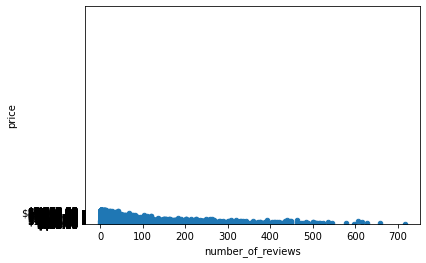

In [70]:
#Apprentissage
var = 'number_of_reviews'
data = pd.concat([df_listings_clean['price'], df_listings_clean[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,10000));

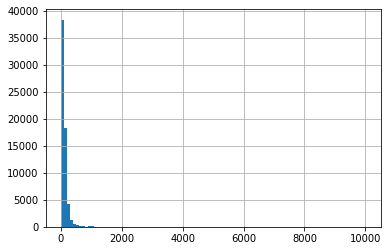

In [75]:
y = df_listings_clean.price
X = df_listings_clean.drop('price', axis=1, inplace=False)
y.hist(bins=100)

In [76]:
from sklearn.model_selection import train_test_split
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print("train set shape: ", X_train.shape, y_train.shape)
print("test set shape: ", X_test.shape, y_test.shape)

(63349, 7)
(63349,)
train set shape:  (44344, 7) (44344,)
test set shape:  (19005, 7) (19005,)


In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score=reg.score(X_test, y_test)
print  ('train score =', train_score)
print  ('test score = {}'.format(test_score))

train score = 0.004217199502297819
test score = 0.0034971640929460928


In [77]:
from sklearn.linear_model import PassiveAggressiveRegressor
reg = PassiveAggressiveRegressor()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score=reg.score(X_test, y_test)
print  ('train score =', train_score)
print  ('test score = {}'.format(test_score))

train score = 0.10457268088890849
test score = 0.08971069642807661


In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score=reg.score(X_test, y_test)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [84]:
print  ('train score =', train_score)
print  ('test score = {}'.format(test_score))

train score = 0.10457268088890849
test score = 0.08971069642807661


In [41]:
feat_imp = pd.DataFrame(reg.featureimportances, X['price'], columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

AttributeError: ignored

In [0]:
df_listings_clean.dtypes

id                        int64
name                     object
summary                  object
description              object
zipcode                  object
property_type            object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
bed_type                 object
amenities                object
price                   float64
availability_365          int64
number_of_reviews         int64
review_scores_rating    float64
instant_bookable         object
dtype: object

In [0]:
#APRES CE N'EST PAS VALIDE ------------------------------------------------------------------------------------------------------------------------------

In [0]:
date_spring_start = "2020-03-20"
date_spring_end = "2020-06-19"

date_spring_start = pd.to_datetime(date_spring_start, format='%Y-%m-%d')
date_spring_end = pd.to_datetime(date_spring_end, format='%Y-%m-%d')


print(date_spring_start)
print(date_spring_end)


for i in range(len(df_listings)) :
    for y in df_calendar[df_calendar['listing_id'] == i] :
      if i == y :
        #Spring
        #if( (datetime.datetime.strptime(df_calendar['date'], '%Y-%m-%d')>datetime.datetime.strptime(date_sprint_start,'%Y-%m-%d')) and (datetime.datetime.strptime(df_calendar['date'], '%Y-%m-%d')<datetime.datetime.strptime(date_sprint_end,'%Y-%m-%d'))) :
        if( (df_calendar['date'].loc[i]>date_spring_start) and (df_calendar['date'].loc[i]<date_spring_end)) :
          for j in df_seasonal_test['id'] :
            if (df_seasonal_test['id'].index[i] == df_calendar['listing_id'].index[i])
              df_seasonal_test['spring_price'].index[i] = df_seasonal_test['spring_price'].index[i] + df_calendar['price'].iloc[i]

          #df_seasonal_test.loc[i] =  [i] + [df_seasonal_test['winter_price'].loc[i]+0] + [df_seasonal_test['summer_price'].loc[i]+0] + [df_seasonal_test['spring_price'].loc[i]+df_calendar['price'].loc[i]] + [df_seasonal_test['autumn_price'].loc[i]+0] 
          df_seasonal_test.append({'id' : i ,'winter_price' :df_seasonal_test['winter_price'].iloc[i]+0 , 'summer_price': df_seasonal_test['summer_price'].iloc[i]+0, 'spring_price' : df_seasonal_test['spring_price'].iloc[i]+df_calendar['price'].iloc[i], 'autumn_price' :df_seasonal_test['autumn_price'].iloc[i]+0 } , ignore_index=True) 
          print(df_seasonal_test['spring_price'].loc[i])
        #Summer
    


2020-03-20 00:00:00
2020-06-19 00:00:00
Nice


IndexError: ignored

In [0]:
df_seasonal_test.head(3)


,id,winter_price,summer_price,spring_price,autumn_price


In [0]:
df_seasonal['winter_price'] = df_listings['price']

df_seasonal.head(5)

,id,winter_price,summer_price,spring_price,autumn_price
0,NaN,$88.00,NaN,NaN,NaN
1,NaN,$65.00,NaN,NaN,NaN
2,NaN,$65.00,NaN,NaN,NaN
3,NaN,$79.00,NaN,NaN,NaN
4,NaN,$105.00,NaN,NaN,NaN


In [0]:
def get_value(value_text):
    dollar = value_text[0]
    return float(value_text[1:])

print(get_value("$70"))
    
for f in df[price]:
    df[f] =df[f].apply(get_value)
    print(f, df[f].dtype, df[f].isnull().sum())

70.0


NameError: ignored

In [0]:
db= df['price']
db.

count      85068
unique       881
top       $50.00
freq        3116
Name: price, dtype: object

ValueError: ignored

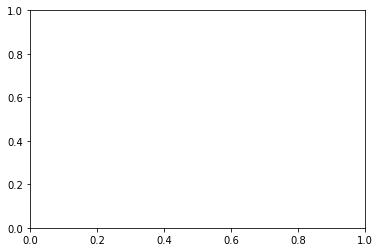

In [0]:
sns.distplot(df['price']);

In [0]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

TypeError: ignored

###Pour voir les corrélations entre prix et variables

- Corrélation entre le nombre minimum de nuit et le prix

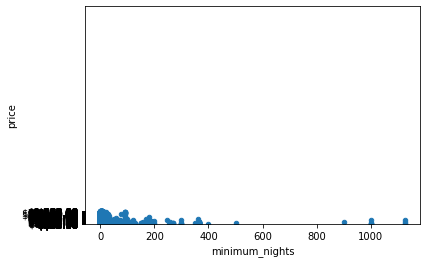

In [0]:
#scatter plot minimum_nights/price
var = 'minimum_nights'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,15000));



- Corrélation entre le nombre la localisation et le prix


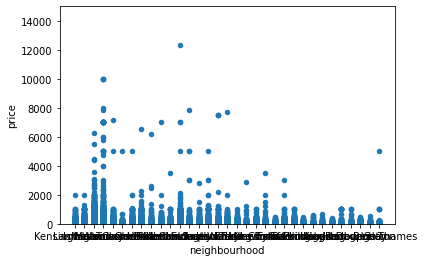

In [0]:
#scatter plot neighbourhood/price
var = 'neighbourhood'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,15000));

- Corrélation entre le nombre de reviews et le prix


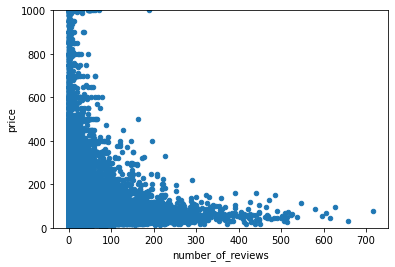

In [0]:
#scatter plot number_of_reviews/price
var = 'number_of_reviews'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,1000));

- Corrélation entre le dernier reviews et le prix

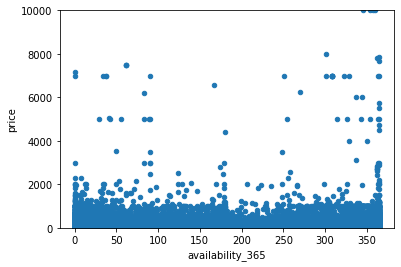

In [0]:
#scatter plot availability/price
var = 'availability_365'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,10000));